In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles

from avm.model import AnchoringVectorClassifier

In [2]:
X_train, y_train = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=10, 
    n_redundant=0,
    n_classes=2, 
    n_clusters_per_class=1,
)

In [3]:
a0 = np.random.randn(45) + 10
a1 = np.random.randn(45) + 10
b0 = np.random.randn(45) - 10
b1 = np.random.randn(45) - 10
X_train = np.vstack([np.c_[a0,a1], np.c_[b0,b1]])
y_train = np.zeros(90)
y_train[:45] = 0
y_train[45:] = 1

In [4]:
X_train, y_train = make_circles(
    n_samples=100,
    noise=0.01, 
    random_state=0,
)

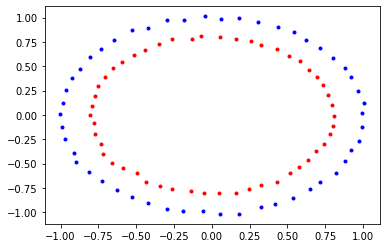

In [5]:
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], 'b.')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], 'r.')
plt.show()

In [6]:
#avc = AnchoringVectorClassifier(tol=0.0001, max_iter=10)
avc = AnchoringVectorClassifier(
    random_state=42, 
    kernel='poly',
    metric='l2',
    solver='gradient-desc',
)

In [7]:
avc.fit(X_train, y_train)

/Users/arlissw/LocalProjects/anchoring-vector-classification/avm/optimizers.py:42: UserWarning: Not converged: Reached max iterations.
  warnings.warn('Not converged: Reached max iterations.')


AnchoringVectorClassifier(kernel='poly', metric='l2', random_state=42)

In [8]:
y_train_pred = avc.predict(X_train)

In [9]:
np.mean(y_train==y_train_pred)

0.97

In [10]:
avc.predict_proba(X_train);

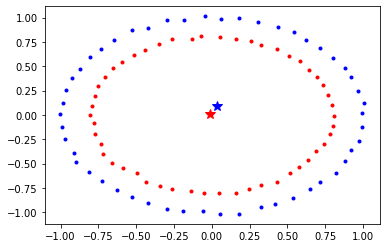

In [11]:
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], 'b.')
plt.plot(*avc.anchor_[0][:2], 'b*', markersize=10)
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], 'r.')
plt.plot(*avc.anchor_[1][:2], 'r*', markersize=10)
plt.show()

---

In [11]:
a0 = np.random.randn(30) + 5
a1 = np.random.randn(30) + 5
b0 = np.random.randn(30) - 5
b1 = np.random.randn(30) + 10
c0 = np.random.randn(30) - 10
c1 = np.random.randn(30) - 10
X_train = np.vstack([np.c_[a0,a1], np.c_[b0,b1], np.c_[c0,c1]])
y_train = np.zeros(90)
y_train[:30] = 1
y_train[-30:] = 2

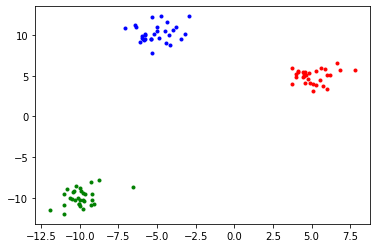

In [12]:
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], 'b.')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], 'r.')
plt.plot(X_train[y_train==2,0], X_train[y_train==2,1], 'g.')
plt.show()

In [13]:
avc = AnchoringVectorClassifier(tol=0.01, max_iter=10)

In [14]:
avc.fit(X_train, y_train)

AnchoringVectorClassifier(tol=0.01)

In [15]:
y_train_pred = avc.predict(X_train)

In [16]:
np.mean(y_train==y_train_pred)

1.0

In [17]:
avc.predict_proba(X_train);

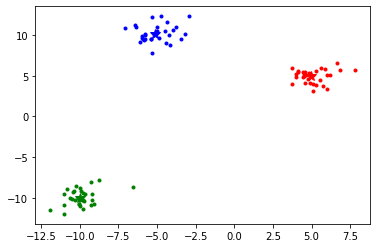

In [18]:
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], 'b.')
plt.plot(*avc.anchor_[0][:2], 'b*', markersize=10)
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], 'r.')
plt.plot(*avc.anchor_[1][:2], 'r*', markersize=10)
plt.plot(X_train[y_train==2,0], X_train[y_train==2,1], 'g.')
plt.plot(*avc.anchor_[2][:2], 'g*', markersize=10)
plt.show()